# Identificar fronteras lineales

In [1]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = make_circles(100, factor=0.1, noise=0.1)

In [3]:
def plt_svc(model, ax=None, plot_support=True):
    """
    Plot de la función de decisión para una clasificación en 2D con SVC
    """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors="blue")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

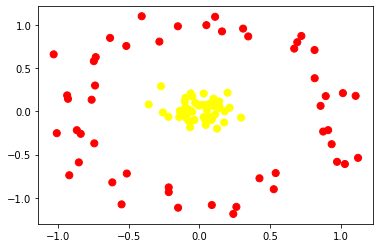

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt.show()

In [5]:
from sklearn.svm import SVC

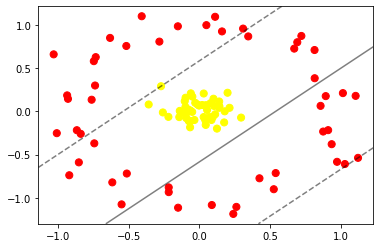

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X, Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.98161719, 0.46234538, 0.41317314, 0.53078927, 0.99014355,
       0.96863215, 0.98662151, 0.98250625, 0.87369726, 0.98289953,
       0.98561817, 0.54973711, 0.34801457, 0.24824485, 0.43208624,
       0.98338284, 0.93518442, 0.9955838 , 0.41869067, 0.91234796,
       0.98950845, 0.21327246, 0.32597214, 0.36343872, 0.47893836,
       0.3120109 , 0.96622175, 0.25213755, 0.99429506, 0.39431356,
       0.98082035, 0.43740865, 0.98763611, 0.50189527, 0.39778472,
       0.41728228, 0.34116415, 0.23987931, 0.95416455, 0.4490456 ,
       0.22403699, 0.97569939, 0.99732306, 0.98367848, 0.98873742,
       0.9870179 , 0.36873844, 0.27625558, 0.30607531, 0.4033323 ,
       0.45014249, 0.98819698, 0.97718047, 0.28666691, 0.33958593,
       0.43929898, 0.97917097, 0.96938487, 0.48125599, 0.23052899,
       0.23161749, 0.96212661, 0.28150967, 0.27815381, 0.99260032,
       0.99428789, 0.91792921, 0.98562282, 0.33668473, 0.44509231,
       0.36162439, 0.95405754, 0.44106542, 0.97549997, 0.41443

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90, -60, -30, 0, 30, 60, 90],
         azim=[-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180],
         X=fixed(X), Y=fixed(Y), r = fixed(r))
plt.show()

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

In [13]:
rbf = SVC(kernel="rbf", C=1e6)
rbf.fit(X, Y)

SVC(C=1000000.0)

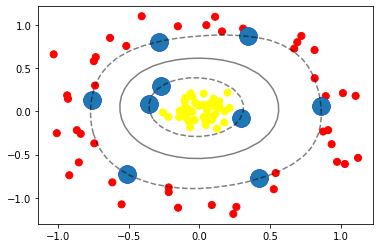

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1], s=300, lw=1)
plt.show()

# Ajustar los parámetros de SVM

In [15]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

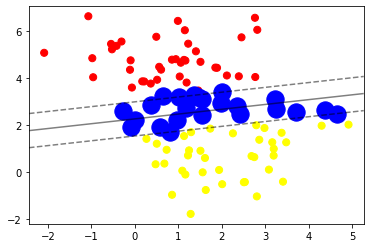

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X, Y)
plt_svc(model)
plt.show()

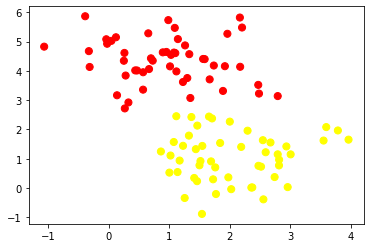

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt.show()

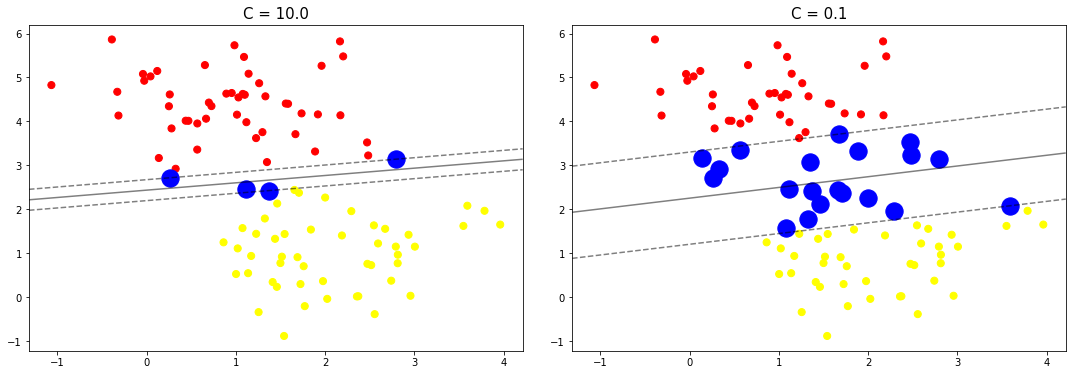

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X, Y)
    ax_i.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size=15)